# Hyperparameter Tuning Iris

##**Overview:**

This exercise focuses on optimising a neural network model by tuning its hyperparameters. By exploring different configurations for the number of units in a hidden layer, the exercise aims to identify the model architecture that achieves the best performance on the Iris dataset. This approach helps in building more efficient and accurate machine learning models by finding the optimal set of hyperparameters automatically, rather than relying on manual trial-and-error.

In [ ]:
# install the Keras-tuner library
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
#Import necessary libraries for data handling, model building, and visualization
import kerastuner as kt

<ipython-input-2-2ba3084d7a45>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)


In [ ]:
# build the model within a function
# Apply hyperparmeter tuning to the number of units in the second hidden layer in the model
def model_builder(hp):
  model = Sequential()
  model.add(tf.keras.layers.Dense(input_dim=4, units=10, activation='relu'))
  hp_units = hp.Int('units', min_value = 10, max_value = 200, step = 10)
  model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
  #model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value = 15, max_value = 350, step = 10), activation='softmax'))
  model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 125,
                     factor = 3,        # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir',  # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt')

In [ ]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
import IPython
# run the hyperparameter search
tuner.search(x_train, y_train, epochs = 125, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 20 Complete [00h 00m 02s]
val_accuracy: 0.2368421107530594

Best val_accuracy So Far: 0.7105262875556946
Total elapsed time: 00h 00m 46s


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(best_hps.values)

{'units': 80, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [ ]:
# apply the optimal hyperparameters to the model and print the summary
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 80)                880       
                                                                 
 dense_5 (Dense)             (None, 3)                 243       
                                                                 
Total params: 1173 (4.58 KB)
Trainable params: 1173 (4.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# retrain the model with the optimum hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.summary()
history = model.fit(x_train, y_train, epochs = 125, validation_data = (x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                50        
                                                                 
 dense_7 (Dense)             (None, 80)                880       
                                                                 
 dense_8 (Dense)             (None, 3)                 243       
                                                                 
Total params: 1173 (4.58 KB)
Trainable params: 1173 (4.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
4/4 [==============================] - 1s 73ms/step - loss: 1.0988 - accuracy: 0.3661 - val_loss: 1.1004 - val_accuracy: 0.2368
Epoch 2/125
4/4 [==============================] - 0s 13ms/step - loss: 1.0909 - accuracy: 0.4375 - val_loss: 1.0920 - val_accuracy: 0.5789
Epoch 

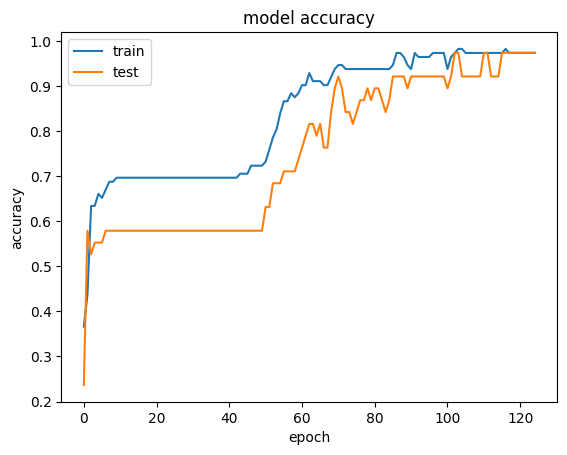

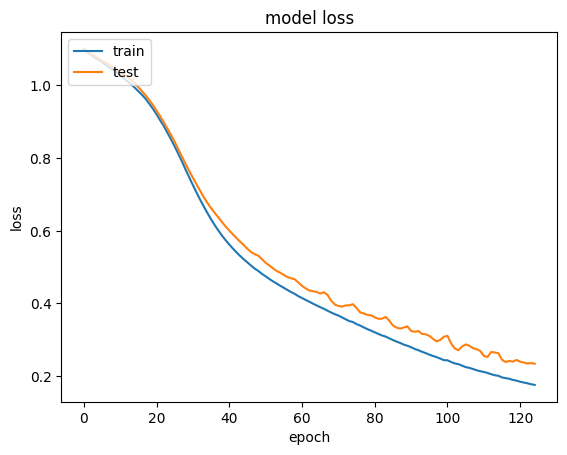

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()